In [27]:
# Import necessary libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud  # Import the WordCloud module
%matplotlib inline
from io import StringIO

# CSV data
csv_data = '''Movie Title,Year of Release
2001: A Space Odyssey,1968
Blade Runner,1982
Star Wars: Episode IV - A New Hope,1977
The Matrix,1999
Inception,2010
Interstellar,2014
E.T. the Extra-Terrestrial,1982
Back to the Future,1985
Alien,1979
The Terminator,1984
Jurassic Park,1993
The Fifth Element,1997
The War of the Worlds,1953
Avatar,2009
Close Encounters of the Third Kind,1977
The Day the Earth Stood Still,1951
Arrival,2016
Metropolis,1927
Star Wars: Episode V - The Empire Strikes Back,1980
Star Wars: Episode VI - Return of the Jedi,1983
'''

# Create a DataFrame
df = pd.read_csv(StringIO(csv_data))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Movie Title      20 non-null     object
 1   Year of Release  20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 448.0+ bytes


In [5]:
df.describe()

,Year of Release
count,20.000000
mean,1983.300000
std,22.235817
min,1927.000000
25%,1977.000000
50%,1982.500000
75%,1997.500000
max,2016.000000


In [28]:
df.head()

,Movie Title,Year of Release
0,2001: A Space Odyssey,1968
1,Blade Runner,1982
2,Star Wars: Episode IV - A New Hope,1977
3,The Matrix,1999
4,Inception,2010


In [7]:
# Number of movies
num_movies = len(df)
print(f"Number of movies: {num_movies}")

Number of movies: 20


In [8]:
# Summary statistics for the year of release
year_stats = df["Year of Release"].describe()
print("\nYear of Release Statistics:")
print(year_stats)


Year of Release Statistics:
count      20.000000
mean     1983.300000
std        22.235817
min      1927.000000
25%      1977.000000
50%      1982.500000
75%      1997.500000
max      2016.000000
Name: Year of Release, dtype: float64


In [9]:
# Oldest and newest movies
oldest_movie = df.loc[df["Year of Release"].idxmin()]
newest_movie = df.loc[df["Year of Release"].idxmax()]
print(f"\nOldest Movie: {oldest_movie['Movie Title']} ({oldest_movie['Year of Release']})")
print(f"Newest Movie: {newest_movie['Movie Title']} ({newest_movie['Year of Release']})")


Oldest Movie: Metropolis (1927)
Newest Movie: Arrival (2016)


In [10]:
# Top 5 movies with the highest year of release
top_5_latest_movies = df.nlargest(5, "Year of Release")
print("\nTop 5 Latest Movies:")
print(top_5_latest_movies)


Top 5 Latest Movies:
     Movie Title  Year of Release
16       Arrival             2016
5   Interstellar             2014
4      Inception             2010
13        Avatar             2009
3     The Matrix             1999


In [11]:
# Frequency of movie releases by decade
df["Decade"] = df["Year of Release"] // 10 * 10
decade_counts = df["Decade"].value_counts().sort_index()
print("\nFrequency of Movie Releases by Decade:")
print(decade_counts)


Frequency of Movie Releases by Decade:
1920    1
1950    2
1960    1
1970    3
1980    6
1990    3
2000    1
2010    3
Name: Decade, dtype: int64


In [12]:
# Movie count per year
year_counts = df["Year of Release"].value_counts().sort_index()
print("\nMovie Count per Year:")
print(year_counts)


Movie Count per Year:
1927    1
1951    1
1953    1
1968    1
1977    2
1979    1
1980    1
1982    2
1983    1
1984    1
1985    1
1993    1
1997    1
1999    1
2009    1
2010    1
2014    1
2016    1
Name: Year of Release, dtype: int64


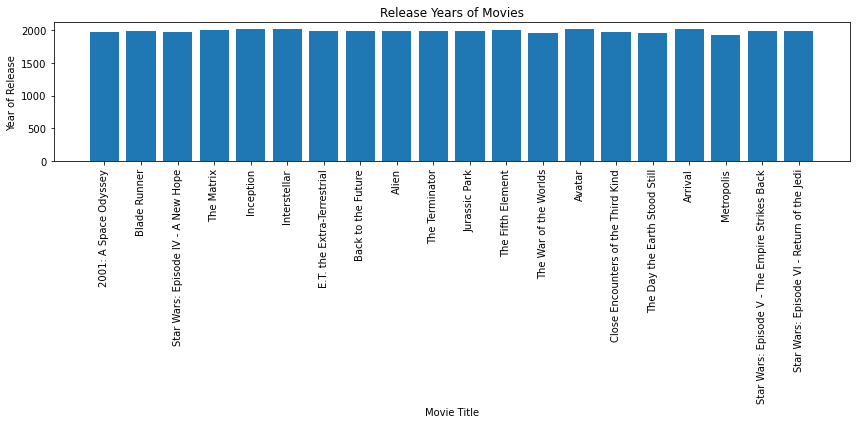

<Figure size 432x288 with 0 Axes>

In [17]:
# Create a bar plot to visualize the release years of movies
plt.figure(figsize=(12, 6))
plt.bar(df['Movie Title'], df['Year of Release'])
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Year of Release')
plt.title('Release Years of Movies')
plt.tight_layout()
plt.show()

# Save the figure as an image (e.g., PNG)
plt.savefig('bar_plot.png', dpi=300, bbox_inches='tight')

plt.show()

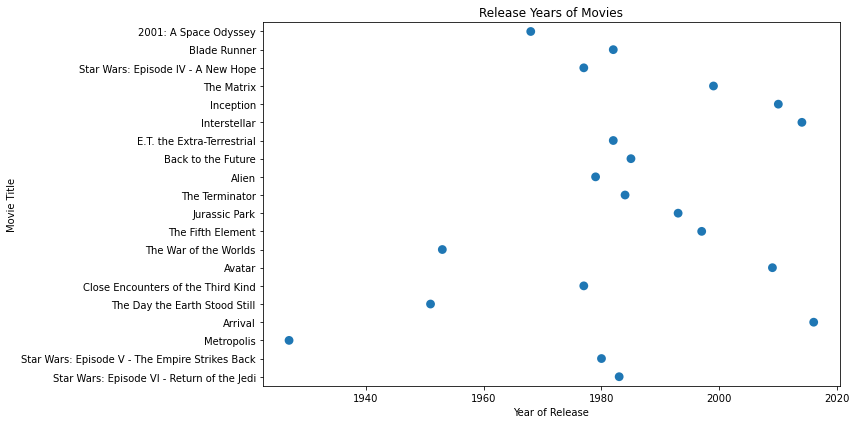

In [18]:
# Create a point plot to visualize the release years of movies
plt.figure(figsize=(12, 6))
sns.pointplot(x='Year of Release', y='Movie Title', data=df, join=False)
plt.xlabel('Year of Release')
plt.ylabel('Movie Title')
plt.title('Release Years of Movies')
plt.tight_layout()
plt.show()

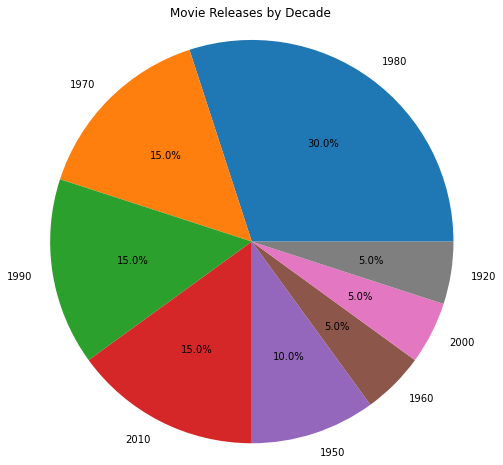

<Figure size 432x288 with 0 Axes>

In [33]:
# Create a pie chart to visualize movie releases by decade
plt.figure(figsize=(8, 8))
plt.pie(decade_counts, labels=decade_counts.index, autopct='%1.1f%%')
plt.title('Movie Releases by Decade')
plt.axis('equal')
plt.show()
plt.savefig('pie_chart.png', dpi=300)

<Figure size 720x432 with 0 Axes>

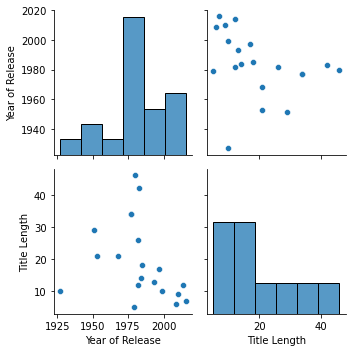

In [32]:
# Calculate movie title lengths
df['Title Length'] = df['Movie Title'].apply(len)

# Create a pair plot to visualize the relationship between movie title length and release year
plt.figure(figsize=(10, 6))
sns.pairplot(data=df, vars=['Year of Release', 'Title Length'])
plt.tight_layout()
plt.savefig('pair_plot.png', dpi=300)
plt.show()


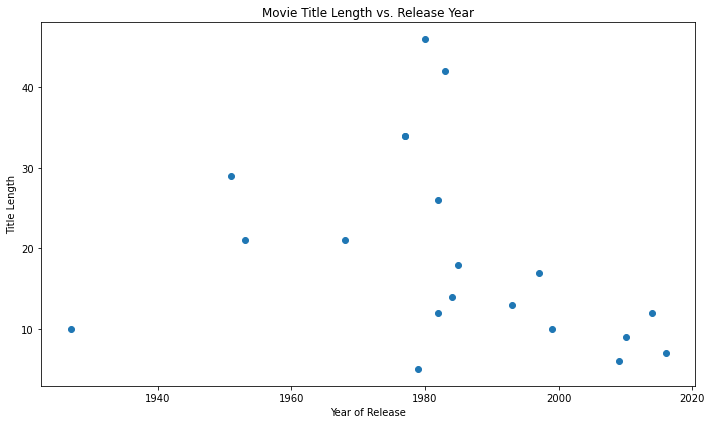

In [34]:
# Create a scatter plot to visualize the relationship between movie title length and release year
plt.figure(figsize=(10, 6))
plt.scatter(df['Year of Release'], df['Title Length'])
plt.xlabel('Year of Release')
plt.ylabel('Title Length')
plt.title('Movie Title Length vs. Release Year')
plt.tight_layout()
plt.show()

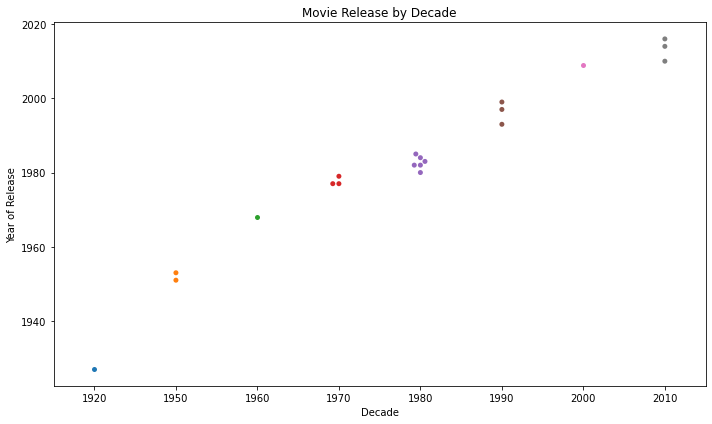

In [36]:
# Extract the decade from the release year
df['Decade'] = df['Year of Release'] // 10 * 10

# Create a swarm plot to visualize movie releases by decade
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Decade', y='Year of Release', data=df)
plt.xlabel('Decade')
plt.ylabel('Year of Release')
plt.title('Movie Release by Decade')
plt.tight_layout()
plt.show()

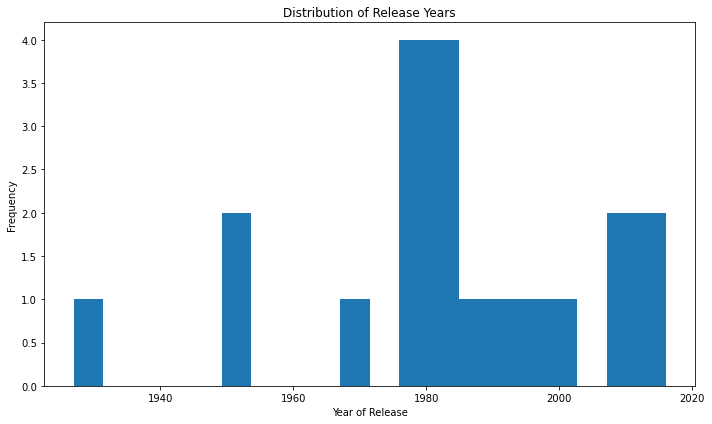

In [37]:
# Create a histogram to visualize the distribution of release years
plt.figure(figsize=(10, 6))
plt.hist(df['Year of Release'], bins=20)
plt.xlabel('Year of Release')
plt.ylabel('Frequency')
plt.title('Distribution of Release Years')
plt.tight_layout()
plt.show()